In [199]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [200]:
df = pd.read_csv('train.csv')


In [201]:
import pandas as pd

# Supondo que 'data' seja o seu DataFrame e 'engine_capacity' seja o nome da coluna
# Substitua 'data' e 'engine_capacity' com os seus dados reais
valores_unicos = df['mileage'].unique()

print("Valores únicos na coluna 'engine_capacity':")
print(valores_unicos)


Valores únicos na coluna 'engine_capacity':
['23.84 kmpl' '17.5 kmpl' '17.4 kmpl' '14.08 kmpl' '21.4 kmpl'
 '17.66 kmpl' '17.52 kmpl' '16.09 kmpl' '22.48 kmpl' '18.24 kmpl'
 '21.74 kmpl' '19.27 kmpl' '23.01 kmpl' '21.5 kmpl' '22.38 kmpl' '18 kmpl'
 '22.41 kmpl' '11 kmpl' '27.39 kmpl' '16.55 kmpl' '19 kmpl' '23.59 kmpl'
 '15.1 kmpl' '18.6 kmpl' nan '20.36 kmpl' '16.38 kmpl' '18.2 kmpl'
 '22.77 kmpl' '17 kmpl' '17.6 kmpl' '18.15 kmpl' '19.34 kmpl' '11.3 kmpl'
 '20.7 kmpl' '22.9 kmpl' '14.84 kmpl' '20.71 kmpl' '17.7 kmpl' '15.8 kmpl'
 '17.05 kmpl' '18.16 kmpl' '16 kmpl' '18.7 kmpl' '14.8 kmpl' '15.74 kmpl'
 '18.3 kmpl' '15.6 kmpl' '15.68 kmpl' '18.9 kmpl' '24.2 kmpl' '14.11 kmpl'
 '16.35 kmpl' '22.05 kmpl' '17.01 kmpl' '23.95 kmpl' '19.17 kmpl'
 '17.8 kmpl' '20 kmpl' '26.1 kmpl' '19.67 kmpl' '12.8 kmpl' '22.07 kmpl'
 '26.2 kmpl' '18.06 kmpl' '14.5 kmpl' '34.05 kmpl' '20.51 kmpl' '33 kmpl'
 '13.68 kmpl' '16.36 kmpl' '25.8 kmpl' '17.3 kmpl' '21.21 kmpl'
 '16.47 kmpl' '13.9 kmpl' '23 kmpl' '

In [202]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

full_name              0
registered_year       54
engine_capacity        9
insurance              5
transmission_type      0
kms_driven             3
owner_type            36
fuel_type              0
max_power             89
seats                  7
mileage              407
body_type              0
city                   0
resale_price_Lakh      0
dtype: int64


In [203]:
# SEATS __________________________________________________
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


# ENGINE __________________________________________________
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')


# KMS __________________________________________________
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

# MAX POWER 
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)

Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]
df['max_power'] = Correct_Max_Power



# MILEAGE __________________________________________________
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40

        consumo_correto.append(valor if pd.notnull(i) else None)

while len(consumo_correto) < len(df):
    consumo_correto.append(None)

df['mileage'] = consumo_correto

media_mileage = df['mileage'].astype(float).mean()
df['mileage'].fillna(media_mileage, inplace=True)

# OWNER TYPE __________________________________________________

# Substituir os valores em branco ('') pela moda ('mode') da coluna 'owner_type'
moda_owner_type = df['owner_type'].mode()[0]  # Calcula a moda
df['owner_type'].replace('', moda_owner_type, inplace=True)

# INSURANCE __________________________________________________
#Deletar "insurance"
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Substituir valores em branco e valores numéricos por 'No Insurance'
df['insurance'] = df['insurance'].apply(lambda x: 'No Insurance' if pd.isnull(x) or pd.api.types.is_numeric_dtype(x) else x)

#Corrigir "Third Party" com espaço extra
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')







Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI

Distinct full names with blank seats:


In [204]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

full_name             0
registered_year      54
engine_capacity       9
insurance             0
transmission_type     0
kms_driven            3
owner_type           36
fuel_type             0
max_power            89
seats                 0
mileage               0
body_type             0
city                  0
resale_price_Lakh     0
dtype: int64


In [205]:
#FullName ______________________________________

#ANO
# Extract the year and create a new column
df['ano'] = df['full_name'].str.extract(r'(\d{4})')

# Display the resulting DataFrame
print(df['ano'])

#MARCA
# Extract the first word after the year and create a new column
df['marca'] = df['full_name'].str.extract(r'\d{4}\s(\w+)')

# Print the resulting DataFrame
print(df['marca'])

#MODELO
# Get everything that comes after "marca"
df['modelo'] = df['full_name'].str.extract(r'\d{4}\s\w+\s(.+)')

# Print the resulting DataFrame
print(df['modelo'])

0        2019
1        2018
2        2015
3        2021
4        2019
         ... 
13951    2021
13952    2017
13953    2017
13954    2017
13955    2015
Name: ano, Length: 13956, dtype: object
0           Tata
1          Honda
2          Honda
3           Tata
4         Maruti
          ...   
13951        Kia
13952    Hyundai
13953      Skoda
13954     Maruti
13955      Honda
Name: marca, Length: 13956, dtype: object
0                                        Tiago XZ Plus
1                                       WR-V i-VTEC VX
2                                       City i VTEC SV
3        New Safari XZA Plus Adventure Edition AT BSVI
4                                  Baleno 1.2 CVT Zeta
                             ...                      
13951                                 Carnival Premium
13952                          i20 1.2 Magna Executive
13953                      Rapid 1.5 TDI Ambition BSIV
13954                                Vitara Brezza ZDi
13955                      

In [206]:
#BODY TYPE ----------------------
#Replace the missing types and the ones that were wrong
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)

Distinct full names with blank body_type:


In [207]:
# Mudar formatos

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'body_type': 'string',
    'mileage': float,
})

In [208]:

novo_valor = df['mileage'].mean()
df['mileage'] = df['mileage'].fillna(novo_valor)

In [209]:
novo_valor = df['engine_capacity'].mean()
df['engine_capacity'] = df['engine_capacity'].fillna(novo_valor)

In [210]:
novo_valor = df['max_power'].mean()
df['max_power'] = df['max_power'].fillna(novo_valor)

In [211]:
novo_valor = df['kms_driven'].mean()
df['kms_driven'] = df['kms_driven'].fillna(novo_valor)

In [212]:
moda_seats = df['owner_type'].mode()[0]
df['owner_type'] = df['owner_type'].fillna(moda_seats)

In [213]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                    object
registered_year              object
engine_capacity             float64
insurance                    object
transmission_type            object
kms_driven                  float64
owner_type                   object
fuel_type                    object
max_power                   float64
seats                       float64
mileage                     float64
body_type            string[python]
city                         object
resale_price_Lakh           float64
ano                         float64
marca                string[python]
modelo               string[python]
dtype: object


In [214]:
df = df.dropna(subset=['registered_year'])
# MARCA __________________________________________________
df = df.dropna(subset=['marca'])
# MODELO __________________________________________________
df = df.dropna(subset=['modelo'])

In [215]:
# Change formats

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
   
})

In [234]:
#brands = df['marca'].tolist()

# Define the criteria for categorization
cheap_brands = ['Tata','Hindustan', 'Maruti', 'Daewoo','Renault', 'Datsun', 'Chevrolet', 'Kia', 'Nissan', 'Mitsubishi', 'Skoda', 'Force', 'Fiat', 'Hindustan', 'Daewoo']
medium_brands = ['Honda','Force', 'Hyundai', 'Volkswagen', 'Ford', 'MG', 'Toyota', 'Land', 'Volvo', 'Citroen', 'Jeep', 'Isuzu', 'OpelCorsa']
high_end_brands = ['BMW','Lexus', 'Bentley','Mercedes', 'Jaguar', 'Lexus', 'Mini', 'Audi', 'Porsche', 'Bentley']

def categoria_marca(brand):
    if brand in cheap_brands:
        return 'Cheap'
    elif brand in medium_brands:
        return 'Medium'
    elif brand in high_end_brands:
        return 'High-End'
    else:
        return 'Uncategorized'

# Apply the categorization function to create a new column
df['categoria_marca'] = df['marca'].apply(categoria_marca)

# Print or use the resulting DataFrame
print(df[['marca','categoria_marca']])
# Identifica as marcas classificadas como 'Uncategorized'
marcas_uncategorized = df[df['categoria_marca'] == 'Uncategorized']['marca'].unique()

# Imprime as marcas classificadas como 'Uncategorized'
print("Marcas classificadas como 'Uncategorized':")
print(marcas_uncategorized)

         marca categoria_marca
0         Tata           Cheap
1        Honda          Medium
2        Honda          Medium
3         Tata           Cheap
4       Maruti           Cheap
...        ...             ...
13951      Kia           Cheap
13952  Hyundai          Medium
13953    Skoda           Cheap
13954   Maruti           Cheap
13955    Honda          Medium

[13508 rows x 2 columns]
Marcas classificadas como 'Uncategorized':
<StringArray>
['Mahindra']
Length: 1, dtype: string


In [217]:
# Contagem de valores nulos na coluna 'categoria_marca'
contagem_nulos = df['categoria_marca'].isnull().sum()
print(contagem_nulos)


0


In [218]:
#Create ID IDF  

# FUEL TYPE __________________________________________________

fuel_types = df['fuel_type']
n_docs = len(df)
idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("FUEL TYPE".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column 
df['id_fuel_type'] = df['fuel_type'].map(idf)


print(df)


____________________FUEL TYPE_____________________
         Petrol: 0.1808108436013733
         Diesel: 0.5145358569867878
            CNG: 1.5242096868527688
       Electric: 2.4584931940276564
            LPG: 2.768863215945781
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954     

In [219]:
# categoria_marca __________________________________________________

fuel_types = df['categoria_marca']

n_docs = len(df)

idf = {}

# Uniques
unique_fuel_types = fuel_types.drop_duplicates()

print("categoria_marca".center(50, "_"))

for fuel_type in unique_fuel_types:
    k = sum(fuel_type == val for val in fuel_types)  
    idf[fuel_type] = np.log10(n_docs / (k + 1))   #+1 to avoid division by zero
    print(f'{fuel_type:>15}: {idf[fuel_type]:>10}')

# Create new column
df['id_categoria_marca'] = df['categoria_marca'].map(idf)

print(df)

_________________categoria_marca__________________
          Cheap: 0.34433665617359366
         Medium: 0.34256416786757016
       High-End: 1.3333235111326576
  Uncategorized: 1.3285017940816413
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vita

In [220]:
# OWNER TYPE __________________________________________________

owner_types = df['owner_type']
n_docs = len(df)

idf = {}
# Uniques
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types) 
    idf[owner_type] = np.log10(n_docs / (k + 1))  

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')
# Create new column 
df['id_owner_type'] = df['owner_type'].map(idf)

print(df)

    First Owner: 0.1513159043723507
    Third Owner: 1.3553447922231374
   Second Owner: 0.6196441032904012
    Fifth Owner: 2.5865230076130983
   Fourth Owner: 2.1094017528934357
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi    

In [221]:
# INSURANCE __________________________________________________

insurance = df['insurance']
n_docs = len(df)
idf = {}

# Uniques
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  
    idf[insurance] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Create new column 
df['id_insurance'] = df['insurance'].map(idf)

    Third Party: 0.2561672213768721
       Zero Dep: 1.3090775235586007
  Comprehensive: 0.44691375314468196
  Not Available: 1.4145877083285747
              1: 3.35243980157973
              2: 3.5285310606354114
   No Insurance: 3.35243980157973


In [222]:
# CITY __________________________________________________

city= df['city']
n_docs = len(df)
idf = {}

# Uniques
unique_cities = city.drop_duplicates()

for city in unique_cities:
    k = sum(city in row for row in df['city'])  
    idf[city] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for city, value in idf.items():
    print(f'{city:>15}: {value:>10}')

# Create new column 
df['id_city'] = df['city'].map(idf)

           Pune: 1.0951613137788256
         Jaipur: 1.2805577942736048
         Mumbai: 0.9237651759315242
        Kolkata: 1.1705962136349577
          Delhi: 0.768863215945781
      Bangalore: 0.8686148605655614
      Hyderabad: 1.027129429868669
        Chennai: 1.130591051963374
        Gurgaon: 1.2221060330847242
     Chandigarh: 1.5940326093918438
      Ahmedabad: 1.1106443702845317
        Lucknow: 1.4981337597786497
           Agra: 1.8777380209834806


In [223]:
valores_unicos_ano = df['ano'].unique()
print(valores_unicos_ano)

[2019. 2018. 2015. 2021. 2013. 2017. 2012. 2022. 2011. 2020. 2014. 2010.
 2016. 2009. 2007. 2023. 2008. 2004. 2005. 2002. 2006. 2003.]


In [224]:
# Definição de 6 grupos e rótulos correspondentes
limites = [0, 5, 10, 15, 20, 25, df['resale_price_Lakh'].max()]
rotulos = ['muito baixa', 'baixa', 'média-baixa', 'média-alta', 'alta', 'muito alta']

# Aplicação dos limites e rótulos para criar as categorias
df['categoria_ano'] = pd.cut(df.groupby('modelo')['resale_price_Lakh'].transform('mean'), bins=limites, labels=rotulos, right=False)

# Mostra o resultado
print(df[['modelo', 'ano', 'categoria_ano']])



                                              modelo     ano categoria_ano
0                                      Tiago XZ Plus  2019.0         baixa
1                                     WR-V i-VTEC VX  2018.0         baixa
2                                     City i VTEC SV  2015.0         baixa
3      New Safari XZA Plus Adventure Edition AT BSVI  2021.0          alta
4                                Baleno 1.2 CVT Zeta  2019.0         baixa
...                                              ...     ...           ...
13951                               Carnival Premium  2021.0    muito alta
13952                        i20 1.2 Magna Executive  2017.0         baixa
13953                    Rapid 1.5 TDI Ambition BSIV  2017.0         baixa
13954                              Vitara Brezza ZDi  2017.0         baixa
13955                                Amaze S i-Vtech  2015.0   muito baixa

[13508 rows x 3 columns]


In [225]:
# MODELO _____________________________________

modelos = df['categoria_ano']
n_docs = len(df)
idf = {}

# Uniques
unique_modelos = modelos.unique()

for modelo in unique_modelos:
    k = sum(modelo == val for val in modelos)  
    idf[modelo] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

# Create new column 
df['id_modelos'] = df['categoria_ano'].map(idf)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [226]:
#BODY TYPE __________________

body_type = df['body_type']
n_docs = len(df)
idf = {}

# Uniques
unique_body_type = body_type.drop_duplicates()

for body_type in unique_body_type:
    k = sum(body_type in row for row in df['body_type']) 
    idf[body_type] = np.log10(n_docs / (k + 1))  #+1 to avoid division by zero

for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')

# Create new column 
df['id_body_type'] = df['body_type'].map(idf)

print(df)

      Hatchback: 0.36313833386560074
            SUV: 0.6002632621852876
          Sedan: 0.5776796017468651
            MUV: 1.3502737398232225
       Minivans: 2.298082139257138
          Coupe: 3.285493011949117
         Pickup: 3.0514098059157493
          Wagon: 3.6534697972437113
   Convertibles: 3.6534697972437113
           Cars: 3.431621047627355
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i

In [227]:
# Transmissao _____________________________________

transmissao = df['transmission_type']

n_docs = len(df)


transmissao_counts = transmissao.value_counts()

idf = {}

for tipo_transmissao, count in transmissao_counts.items():
    idf[tipo_transmissao] = np.log10(n_docs / (count + 1))  #+1 to avoid division by zero

# Create new column 
df['id_transmissao'] = df['transmission_type'].map(idf)


print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity      insurance transmission_type  kms_driven  \
0               

In [228]:

df = df.astype({
    'seats': float,
    'engine_capacity': float,
    'kms_driven': float,
    'max_power': float,
    'ano': float,
    'marca': 'string',
    'modelo': 'string',
    'id_categoria_marca': float,
})

In [229]:
contagem_nulos = df.isnull().sum()

print(f"O número de valores nulos na coluna é: {contagem_nulos}")

O número de valores nulos na coluna é: full_name             0
registered_year       0
engine_capacity       0
insurance             0
transmission_type     0
kms_driven            0
owner_type            0
fuel_type             0
max_power             0
seats                 0
mileage               0
body_type             0
city                  0
resale_price_Lakh     0
ano                   0
marca                 0
modelo                0
categoria_marca       0
id_fuel_type          0
id_categoria_marca    0
id_owner_type         0
id_insurance          0
id_city               0
categoria_ano         1
id_modelos            0
id_body_type          0
id_transmissao        0
dtype: int64


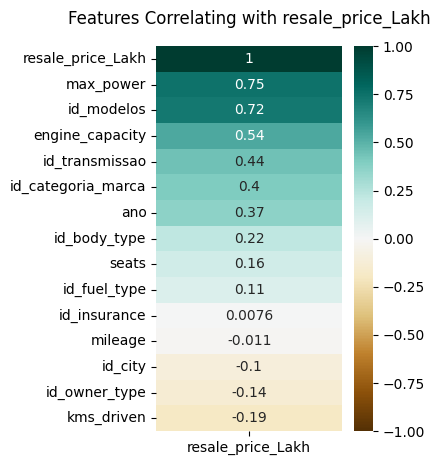

In [230]:
#correlation  

# Select columns
columns_of_interest = ['id_transmissao', 'id_body_type','id_modelos','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','engine_capacity','id_fuel_type','kms_driven','max_power','id_owner_type','resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

In [231]:
#Export
#Not the target
colunas_selecionadas = ['id_transmissao', 'id_body_type','id_modelos','id_categoria_marca', 'mileage','ano','id_city','id_insurance','seats','engine_capacity','id_fuel_type','kms_driven','max_power','id_owner_type','resale_price_Lakh']


if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('Cenario11-12-2023V2.csv', index=False)

In [232]:
df.columns

Index(['full_name', 'registered_year', 'engine_capacity', 'insurance',
       'transmission_type', 'kms_driven', 'owner_type', 'fuel_type',
       'max_power', 'seats', 'mileage', 'body_type', 'city',
       'resale_price_Lakh', 'ano', 'marca', 'modelo', 'categoria_marca',
       'id_fuel_type', 'id_categoria_marca', 'id_owner_type', 'id_insurance',
       'id_city', 'categoria_ano', 'id_modelos', 'id_body_type',
       'id_transmissao'],
      dtype='object')

In [233]:
#Export
#Not the target
colunas_selecionadas = ['transmission_type','id_transmissao','body_type','id_body_type','modelo','categoria_ano','id_modelos','marca','categoria_marca','id_categoria_marca', 'mileage','ano','city','id_city','insurance','id_insurance','seats','engine_capacity','fuel_type','id_fuel_type','kms_driven','max_power','owner_type','id_owner_type','resale_price_Lakh']


if set(colunas_selecionadas).issubset(df.columns):
    df_selecionado = df[colunas_selecionadas]
    df_selecionado.to_csv('todasIdeia2.csv', index=False)